In [1]:
import pandas as pd
import geopandas as gpd
#import simpledbf
import matplotlib.pyplot as plt

In [3]:
norwest = pd.read_excel(r"/Users/taohuang/Downloads/NorWeST_ObservedStreamTempDailySummaries_MidSnake_AllDays.xlsx")
norwest.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 406421 entries, 0 to 406420
Data columns (total 9 columns):
 #   Column      Non-Null Count   Dtype         
---  ------      --------------   -----         
 0   OBSPRED_ID  406421 non-null  int64         
 1   NoRWeST_ID  406421 non-null  object        
 2   SampleDate  406421 non-null  datetime64[ns]
 3   DailyMax    406421 non-null  float64       
 4   DailyMin    406421 non-null  float64       
 5   DailyMean   406421 non-null  float64       
 6   DailySD     376695 non-null  float64       
 7   Nobs        376695 non-null  float64       
 8   DailyRange  406421 non-null  float64       
dtypes: datetime64[ns](1), float64(6), int64(1), object(1)
memory usage: 27.9+ MB


In [4]:
mann = gpd.read_file(r"/Users/taohuang/Downloads/download-3/mann_NORWEST.dbf")
mann.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 8 entries, 0 to 7
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   OBSPRED_ID  8 non-null      int64   
 1   PERMA_FID   8 non-null      int64   
 2   SampleYear  8 non-null      int64   
 3   UOM         8 non-null      object  
 4   GNIS_NAME   8 non-null      object  
 5   Source      8 non-null      object  
 6   COMID       8 non-null      int64   
 7   geometry    8 non-null      geometry
dtypes: geometry(1), int64(4), object(3)
memory usage: 644.0+ bytes


In [5]:
norwest_mann = pd.merge(norwest, mann, on='OBSPRED_ID', how='inner')
norwest_mann

,OBSPRED_ID,NoRWeST_ID,SampleDate,DailyMax,DailyMin,DailyMean,DailySD,Nobs,DailyRange,PERMA_FID,SampleYear,UOM,GNIS_NAME,Source,COMID,geometry
0,326,MidSnake_326,2004-06-10,11.18,9.93,10.773750,0.453776,8.0,1.25,3586,2004,DegC,Mann Creek,IDState_DEQ,24184750,POINT (1267938.580 1591602.982)
1,326,MidSnake_326,2004-06-11,13.34,7.78,10.301250,1.984718,24.0,5.56,3586,2004,DegC,Mann Creek,IDState_DEQ,24184750,POINT (1267938.580 1591602.982)
2,326,MidSnake_326,2004-06-12,13.50,8.09,11.002083,1.982769,24.0,5.41,3586,2004,DegC,Mann Creek,IDState_DEQ,24184750,POINT (1267938.580 1591602.982)
3,326,MidSnake_326,2004-06-13,15.36,10.88,12.889167,1.752695,24.0,4.48,3586,2004,DegC,Mann Creek,IDState_DEQ,24184750,POINT (1267938.580 1591602.982)
4,326,MidSnake_326,2004-06-14,15.52,10.26,12.797083,1.789968,24.0,5.26,3586,2004,DegC,Mann Creek,IDState_DEQ,24184750,POINT (1267938.580 1591602.982)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2129,941,MidSnake_941,2010-09-26,12.55,10.77,11.665833,0.612762,24.0,1.78,15844,2010,Deg F,Mann Creek,USACE_NWD,24184754,POINT (1266874.613 1596199.327)
2130,941,MidSnake_941,2010-09-27,13.11,11.33,12.092174,0.577730,23.0,1.78,15844,2010,Deg F,Mann Creek,USACE_NWD,24184754,POINT (1266874.613 1596199.327)
2131,941,MidSnake_941,2010-09-28,13.11,11.44,12.325000,0.584071,24.0,1.67,15844,2010,Deg F,Mann Creek,USACE_NWD,24184754,POINT (1266874.613 1596199.327)
2132,941,MidSnake_941,2010-09-29,13.11,11.44,12.417143,0.588949,21.0,1.67,15844,2010,Deg F,Mann Creek,USACE_NWD,24184754,POINT (1266874.613 1596199.327)


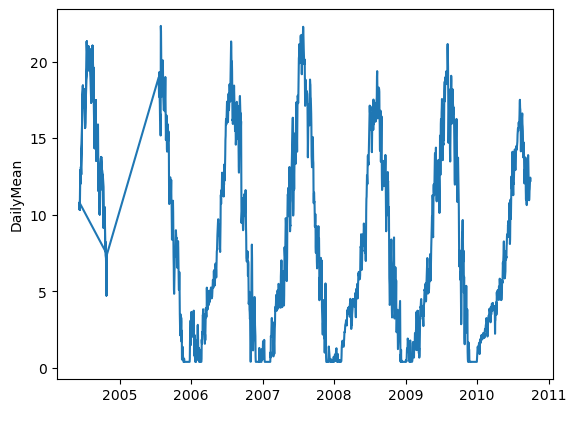

In [6]:
plt.plot( norwest_mann['SampleDate'],  norwest_mann['DailyMean'] )
plt.xlabel(" ")
plt.ylabel("DailyMean")
plt.show()

['MidSnake_326' 'MidSnake_368' 'MidSnake_932' 'MidSnake_933'
 'MidSnake_935' 'MidSnake_937' 'MidSnake_939' 'MidSnake_941']
NoRWeST_ID
MidSnake_939    361
MidSnake_937    355
MidSnake_933    353
MidSnake_935    352
MidSnake_941    273
MidSnake_932    158
MidSnake_326    141
MidSnake_368    141
Name: count, dtype: int64


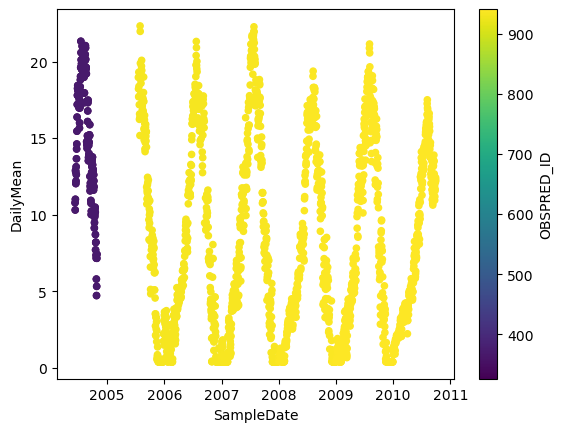

In [7]:
print( norwest_mann['NoRWeST_ID'].unique())
print(norwest_mann['NoRWeST_ID'].value_counts())
ax2 = norwest_mann.plot.scatter(x='SampleDate',y='DailyMean',c='OBSPRED_ID',colormap='viridis')

NoRWeST_ID
MidSnake_326    141
MidSnake_368    141
Name: count, dtype: int64


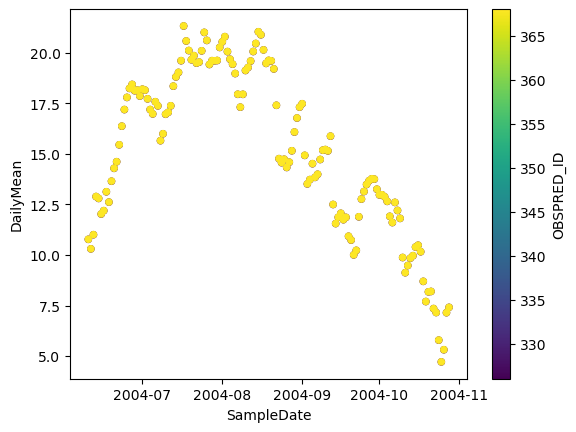

In [8]:
MidSnake_3=norwest_mann[ norwest_mann["NoRWeST_ID"].isin(["MidSnake_326","MidSnake_368"]) ]
print(MidSnake_3['NoRWeST_ID'].value_counts())
ax2 = MidSnake_3.plot.scatter(x='SampleDate',y='DailyMean',c='OBSPRED_ID',colormap='viridis')

NoRWeST_ID
MidSnake_939    361
MidSnake_937    355
MidSnake_933    353
MidSnake_935    352
MidSnake_941    273
MidSnake_932    158
Name: count, dtype: int64


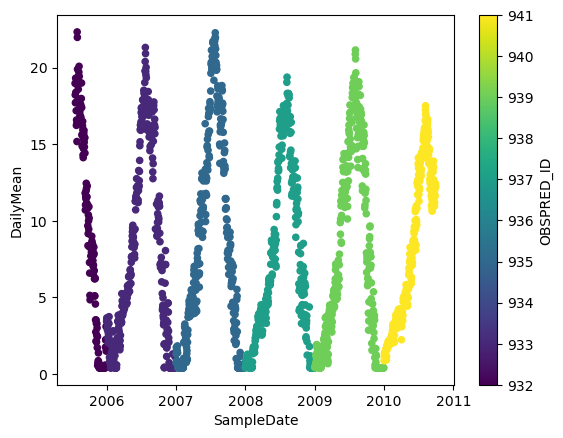

In [65]:
MidSnake_9=norwest_mann[ norwest_mann["NoRWeST_ID"].isin([ 'MidSnake_932', 'MidSnake_933','MidSnake_935' ,'MidSnake_937', 'MidSnake_939' ,'MidSnake_941']) ]
print(MidSnake_9['NoRWeST_ID'].value_counts())
ax2 = MidSnake_9.plot.scatter(x='SampleDate',y='DailyMean',c='OBSPRED_ID',colormap='viridis')

In [66]:
MidSnake_9.dtypes

#MidSnake_9['Date0'] = MidSnake_9['SampleDate'].dt.date

MidSnake_9['Date'] = MidSnake_9['SampleDate'].dt.strftime('%Y-%m-%d')

#MidSnake_9['Date'] = MidSnake_9['Date0'].strftime('%Y-%m-%d')

print(MidSnake_9.dtypes)

print(MidSnake_9['Date'])
#type(MidSnake_9['SampleDate'][[0]] )
#print(type(MidSnake_9['SampleDate'][0]))

OBSPRED_ID             int64
NoRWeST_ID            object
SampleDate    datetime64[ns]
DailyMax             float64
DailyMin             float64
DailyMean            float64
DailySD              float64
Nobs                 float64
DailyRange           float64
PERMA_FID              int64
SampleYear             int64
UOM                   object
GNIS_NAME             object
Source                object
COMID                  int64
geometry            geometry
Date                  object
dtype: object
282     2005-07-19
283     2005-07-20
284     2005-07-21
285     2005-07-22
286     2005-07-23
           ...    
2129    2010-09-26
2130    2010-09-27
2131    2010-09-28
2132    2010-09-29
2133    2010-09-30
Name: Date, Length: 1852, dtype: object


/var/folders/_4/klhstfsn73nfrxlfr8_r9dhc0000gn/T/ipykernel_2294/3946039010.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  MidSnake_9['Date'] = MidSnake_9['SampleDate'].dt.strftime('%Y-%m-%d')


In [67]:
all_idv=[ 'DailyMax','DailyMin','DailyMean' ]
corr_matrix= MidSnake_9[ all_idv].corr()
print( corr_matrix )
#sns.heatmap(corr_matrix, annot=True)

           DailyMax  DailyMin  DailyMean
DailyMax   1.000000  0.971242   0.992995
DailyMin   0.971242  1.000000   0.991556
DailyMean  0.992995  0.991556   1.000000


In [68]:
PRISM_MidSnake_939 = pd.read_csv(r"PRISM_MidSnake_939.csv")
PRISM_MidSnake_939['SampleDate']=PRISM_MidSnake_939['Date']
PRISM_MidSnake_939


,Date,ppt (mm),tmin (degrees C),tmean (degrees C),tmax (degrees C),tdmean (degrees C),vpdmin (hPa),vpdmax (hPa),SampleDate
0,2005-10-01,2.63,11.0,15.9,20.8,4.7,3.59,16.08,2005-10-01
1,2005-10-02,11.08,1.6,7.6,13.6,3.2,0.06,7.38,2005-10-02
2,2005-10-03,3.64,0.9,6.0,11.1,0.9,0.15,6.85,2005-10-03
3,2005-10-04,5.24,0.4,5.3,10.3,1.4,0.13,5.95,2005-10-04
4,2005-10-05,0.00,0.1,5.8,11.4,-1.7,0.41,8.24,2005-10-05
...,...,...,...,...,...,...,...,...,...
2553,2012-09-27,0.00,9.5,17.4,25.4,0.3,5.15,25.56,2012-09-27
2554,2012-09-28,0.00,8.9,17.3,25.8,0.0,5.84,27.17,2012-09-28
2555,2012-09-29,0.00,11.1,17.1,23.0,1.1,7.44,21.37,2012-09-29
2556,2012-09-30,0.00,10.6,18.6,26.5,2.2,5.24,28.31,2012-09-30


In [69]:
print(type(PRISM_MidSnake_939['Date'][0]))

print(type(MidSnake_9['Date'] ))

<class 'str'>
<class 'pandas.core.series.Series'>


In [70]:
PRISM_MidSnake_939 = PRISM_MidSnake_939.set_index('Date')  # Set 'index_col' as the index
MidSnake_9=MidSnake_9.set_index('Date')

print(PRISM_MidSnake_939)

print(MidSnake_9)

result = pd.concat([PRISM_MidSnake_939, MidSnake_9], axis=1)

print(result)

            ppt (mm)  tmin (degrees C)  tmean (degrees C)  tmax (degrees C)  \
Date                                                                          
2005-10-01      2.63              11.0               15.9              20.8   
2005-10-02     11.08               1.6                7.6              13.6   
2005-10-03      3.64               0.9                6.0              11.1   
2005-10-04      5.24               0.4                5.3              10.3   
2005-10-05      0.00               0.1                5.8              11.4   
...              ...               ...                ...               ...   
2012-09-27      0.00               9.5               17.4              25.4   
2012-09-28      0.00               8.9               17.3              25.8   
2012-09-29      0.00              11.1               17.1              23.0   
2012-09-30      0.00              10.6               18.6              26.5   
2012-10-01      0.00              10.2              

Index(['ppt (mm)', 'tmin (degrees C)', 'tmean (degrees C)', 'tmax (degrees C)',
       'tdmean (degrees C)', 'vpdmin (hPa)', 'vpdmax (hPa)', 'SampleDate',
       'OBSPRED_ID', 'NoRWeST_ID', 'SampleDate', 'DailyMax', 'DailyMin',
       'DailyMean', 'DailySD', 'Nobs', 'DailyRange', 'PERMA_FID', 'SampleYear',
       'UOM', 'GNIS_NAME', 'Source', 'COMID', 'geometry'],
      dtype='object')


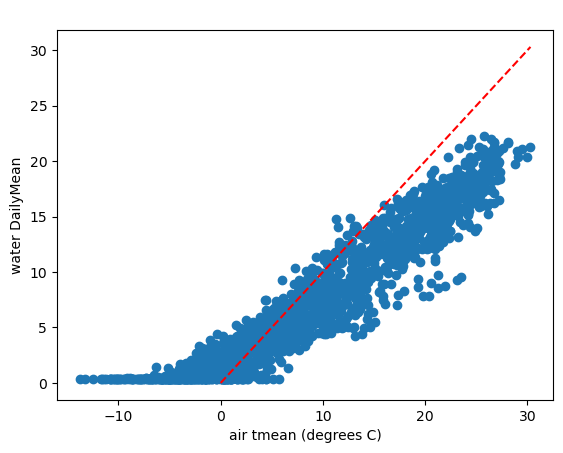

In [75]:
print(result.columns)
# Create the scatter plot
plt.scatter( result['tmean (degrees C)'],  result['DailyMean'] )

# Add the 1:1 line
plt.plot([0, max( result['tmean (degrees C)'])], [0, max( result['tmean (degrees C)'])], color='red', linestyle='--')

# Set labels and title
plt.xlabel("air tmean (degrees C)")
plt.ylabel("water DailyMean")
plt.title(" ")

# Show the plot
plt.show()

In [73]:
result['tmean (degrees C)']

Date
2005-10-01    15.9
2005-10-02     7.6
2005-10-03     6.0
2005-10-04     5.3
2005-10-05     5.8
              ... 
2005-09-26     NaN
2005-09-27     NaN
2005-09-28     NaN
2005-09-29     NaN
2005-09-30     NaN
Name: tmean (degrees C), Length: 2632, dtype: float64

In [74]:
result['DailyMean']

Date
2005-10-01    10.164167
2005-10-02     8.282500
2005-10-03     7.265417
2005-10-04     6.571250
2005-10-05     5.113750
                ...    
2005-09-26     9.147143
2005-09-27    10.370417
2005-09-28     9.981667
2005-09-29     9.439583
2005-09-30    10.908333
Name: DailyMean, Length: 2632, dtype: float64